In [60]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics
from statistics import stdev 
import pandas as pd
import math
from datetime import date

In [2]:
import pandas as pd

url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
df=pd.read_csv(url)

In [3]:
df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,280,280,301,303,307,309,310,310,310,312
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,31,31,31,31,31,31,31,33,33,33
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,7787,7916,8585,8714,8745,8862,9137,9366,9654,10010
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,111,111,112,116,122,144,153,167,181,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,201,209,217,227,234,243,263,266,270,271
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,40,40,41,41,45,47,50,54,54,55
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,1660,1689,1731,1805,1840,1881,1949,2005,2069,2116
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,55,55,56,56,59,63,63,65,69,72


In [9]:
df.columns.get_loc("2/1/20")
# df.groupby(['id']).sum()

21

In [13]:
a=df.groupby(['Country_Region']).sum()
a

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
Country_Region,,,,,,,,,,,,,,,,,,,,,
US,273609029778,2737432,104327612.0,121198.00905,-290751.983626,1,1,2,2,5,...,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3363056


In [14]:
a_T=a.T
a_T

Country_Region,US
UID,2.736090e+11
code3,2.737432e+06
FIPS,1.043276e+08
Lat,1.211980e+05
Long_,-2.907520e+05
...,...
7/9/20,3.117946e+06
7/10/20,3.184573e+06
7/11/20,3.245925e+06
7/12/20,3.304942e+06


In [62]:
cases_confirmed=a_T.tail(174)
cases_confirmed.rename(columns={'Country_Region': 'Date', 'US': 'Cases_Confirmed'}, inplace=True)

In [72]:
b=cases_confirmed["Cases_Confirmed"]
b

1/22/20          1.0
1/23/20          1.0
1/24/20          2.0
1/25/20          2.0
1/26/20          5.0
             ...    
7/9/20     3117946.0
7/10/20    3184573.0
7/11/20    3245925.0
7/12/20    3304942.0
7/13/20    3363056.0
Name: Cases_Confirmed, Length: 174, dtype: float64

In [73]:
# b.groupby(pd.TimeGrouper('M')).sum()
b = b.reset_index()
b

,index,Cases_Confirmed
0,1/22/20,1.0
1,1/23/20,1.0
2,1/24/20,2.0
3,1/25/20,2.0
4,1/26/20,5.0
...,...,...
169,7/9/20,3117946.0
170,7/10/20,3184573.0
171,7/11/20,3245925.0
172,7/12/20,3304942.0


In [74]:
b.columns=["Date", "Cases_confirmed"]

In [83]:
b.index = pd.to_datetime(b['Date'],format='%m/%d/%y')

In [86]:
b=b["Cases_confirmed"]

In [93]:
yo=b.groupby(pd.Grouper(freq='M')).sum()

In [106]:
yo=yo.head(5)
yo

Date
2020-01-31          38.0
2020-02-29         378.0
2020-03-31     1091068.0
2020-04-30    19552396.0
2020-05-31    45406912.0
Freq: M, Name: Cases_confirmed, dtype: float64

In [101]:
meat = pd.read_csv('meat2.txt', header=None)
meat.columns=["Date", "Total_meat_production"]
meat4months=meat.head(5)
meat4months

,Date,Total_meat_production
0,2020-05-01,11505.527
1,2020-04-01,11776.963
2,2020-03-01,14374.418
3,2020-02-01,12785.940
4,2020-01-01,14407.956


In [107]:
meat4months.index = pd.to_datetime(meat4months['Date'])
meat4months=meat4months["Total_meat_production"]

In [108]:
meat4months.sort_index(inplace=True)

/Users/aslihancelik/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:3363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [109]:
meat4months

Date
2020-01-01    14407.956
2020-02-01    12785.940
2020-03-01    14374.418
2020-04-01    11776.963
2020-05-01    11505.527
Name: Total_meat_production, dtype: float64

In [124]:

X = yo.values
y = meat4months.values


X=X.reshape(-1, 1)
y=y.reshape(-1, 1)

# # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)



In [125]:
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)



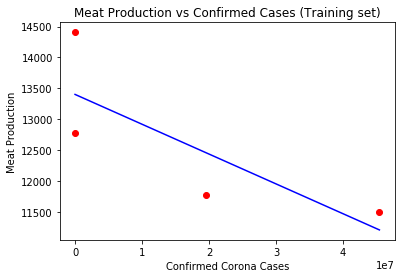

In [127]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Meat Production vs Confirmed Cases (Training set)')
plt.xlabel('Confirmed Corona Cases')
plt.ylabel('Meat Production')
plt.show()


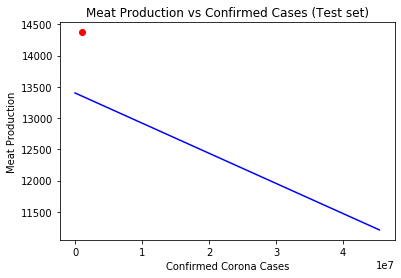

In [128]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Meat Production vs Confirmed Cases (Test set)')
plt.xlabel('Confirmed Corona Cases')
plt.ylabel('Meat Production')
plt.show()

